# credit card segmentation

## Problem Statement

This case requires trainees to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behaviour of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioural variables.

## Data PreProcessing

Here we are now doing a data preprocessing and we will be cresting the New KPI’s and also we will be doing data scaling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('C:/Users/jhemmann/Desktop/Edwisor-project/')
os.getcwd()

'C:\\Users\\jhemmann\\Desktop\\Edwisor-project'

In [3]:
credit = pd.read_csv('credit-card-data.csv')

In [4]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
credit.shape

(8950, 18)

In [7]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
credit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)
print(credit.isna().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [10]:
credit_copy = credit.copy()

## Deriving New KPI's

Here we are deriving New KPI as asked in a problem statements.
* Monthly average perchase is purchases by tenure
* monthly cash advance is cash advance by tenure
* creating categories by using One_off purchase and installment purchases
* limit usage is basically ratio of balance to limit usage
* Pay_minPay is the ratio of payments to minimum payments 

These are the new KPI's formed

In [11]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/(credit['TENURE'])
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/(credit['TENURE'])

In [12]:
credit.shape 

(8950, 20)

In [13]:
credit['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [14]:
credit['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [15]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(15)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [16]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [17]:
credit[(credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [18]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 20)

In [19]:
credit[(credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 20)

In [20]:
def purchase_type(credit):
    if ((credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)):
        return 'none'
    if ((credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES']==0)):
        return 'oneoff'
    if ((credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES'] > 0)):
        return 'installment'
    if ((credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] > 0)):
        return 'both_oneoff_installment'

In [21]:
credit['purchase_type'] = credit.apply(purchase_type,axis = 1)

In [22]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
oneoff                     1874
Name: purchase_type, dtype: int64

In [23]:
credit['LIMIT_USAGE'] = credit['BALANCE']/credit['CREDIT_LIMIT']

In [24]:
credit['LIMIT_USAGE'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: LIMIT_USAGE, dtype: float64

In [25]:
credit.loc[:,['BALANCE','CREDIT_LIMIT','LIMIT_USAGE']].head()

,BALANCE,CREDIT_LIMIT,LIMIT_USAGE
0,40.900749,1000.0,0.040901
1,3202.467416,7000.0,0.457495
2,2495.148862,7500.0,0.332687
3,1666.670542,7500.0,0.222223
4,817.714335,1200.0,0.681429


In [26]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'purchase_type',
       'LIMIT_USAGE'],
      dtype='object')

In [27]:
credit.loc[:,['PAYMENTS','MINIMUM_PAYMENTS']].head()

,PAYMENTS,MINIMUM_PAYMENTS
0,201.802084,139.509787
1,4103.032597,1072.340217
2,622.066742,627.284787
3,0.000000,312.343947
4,678.334763,244.791237


In [28]:
credit['PAY_MINPAY'] = credit['PAYMENTS'] / credit['MINIMUM_PAYMENTS']

In [29]:
credit.loc[:,['PAYMENTS','MINIMUM_PAYMENTS','PAY_MINPAY']].head()

,PAYMENTS,MINIMUM_PAYMENTS,PAY_MINPAY
0,201.802084,139.509787,1.446508
1,4103.032597,1072.340217,3.826241
2,622.066742,627.284787,0.991682
3,0.000000,312.343947,0.000000
4,678.334763,244.791237,2.771075


In [30]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [31]:
#pd.get_dummies(credit['purchase_type']).head()
credit_original = pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis = 1)

## Treating the outliers

Here are treating the outlier by scaling the data using log transformation and we will selecting the column which does not contribute in formation of KPI's

In [32]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [33]:
credit_transform = credit.drop(['CUST_ID','purchase_type'],axis = 1).applymap(lambda x:np.log(x+1))

In [34]:
credit_transform.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,LIMIT_USAGE,PAY_MINPAY
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [35]:
credit_transform.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161637,2.013303,0.000000,4.861995,6.773521,7.628099,9.854515
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.000000,0.635989,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016449,10.760839
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.000000,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.000000,0.000000,0.000000,0.200671,0.916291


In [36]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
credit_transform_selected= credit_transform[[x for x in credit_transform.columns if x not in col ]]

## preparing for Machine Learning

Here we will be preparing the data for machine learning algorithm.
we Need to convert the purchase_type column into binary variable. 

In [37]:
credit_transform_selected['PURCHASE_TYPE'] = credit.loc[:,'purchase_type']

C:\Users\jhemmann\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
credit_transform_selected.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'LIMIT_USAGE', 'PAY_MINPAY', 'PURCHASE_TYPE'],
      dtype='object')

In [39]:
pd.get_dummies(credit_transform_selected['PURCHASE_TYPE']).head()

,both_oneoff_installment,installment,none,oneoff
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [40]:
credit_transform_selected_ML = pd.concat([credit_transform_selected,pd.get_dummies(credit_transform_selected['PURCHASE_TYPE'])],axis = 1)

In [41]:
drop_col = ['PURCHASE_TYPE']
credit_transform_selected_ML = credit_transform_selected_ML.drop(drop_col,axis = 1)
credit_transform_selected_ML.isna().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
LIMIT_USAGE                         0
PAY_MINPAY                          0
both_oneoff_installment             0
installment                         0
none                                0
oneoff                              0
dtype: int64

In [42]:
credit_transform_selected_ML.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.0,0.635989,0.693147,0.693147,0.693147
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.0,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.0,0.000000,4.499810,6.151961,10.021315
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.0,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.0,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.0,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.0,0.000000,0.000000,0.200671,0.916291
CASH_ADVANCE_TRX,8950.0,0.817570,1.009316,0.0,0.000000,0.000000,1.609438,4.820282
PURCHASES_TRX,8950.0,1.894731,1.373856,0.0,0.693147,2.079442,2.890372,5.883322
Monthly_avg_purchase,8950.0,3.050877,2.002823,0.0,1.481458,3.494587,4.587295,8.315721


In [43]:
credit_transform_selected_ML.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'LIMIT_USAGE', 'PAY_MINPAY',
       'both_oneoff_installment', 'installment', 'none', 'oneoff'],
      dtype='object')

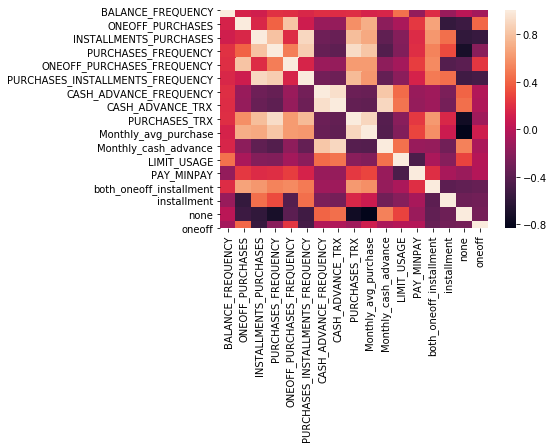

In [44]:
sns.heatmap(credit_transform_selected_ML.corr())

By seeing the heatmap we can conclude that number of variable is too much and we need to reduce the number of variable.

### Standardrizing and scaling of the data  

We can reduce the number of variable by using the PCA (principal Component Algorithm). For PCA to work we need to scale the data and then we will be using the PCA.

Before Applying the PCA we need to find the optimal value for number of component. we will be using the elbow method to find the optimal number of component

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_scaled_ML = scaler.fit_transform(credit_transform_selected_ML)

### Applying the PCA 

In [46]:
from sklearn.decomposition import PCA

In [47]:
credit_scaled_ML.shape

(8950, 17)

In [48]:
var_ratio = {}
for n in range(4,15):
    pc = PCA(n_components = n)
    credit_scaled_pca = pc.fit(credit_scaled_ML)
    var_ratio[n] = sum(credit_scaled_pca.explained_variance_ratio_)

In [49]:
credit_scaled_ML.shape

(8950, 17)

In [50]:
var_ratio

{4: 0.8115442762351261,
 5: 0.877055579529143,
 6: 0.9186492443512619,
 7: 0.9410925256030135,
 8: 0.961611405368306,
 9: 0.9739787081990647,
 10: 0.9835896584630718,
 11: 0.9897248107341949,
 12: 0.9927550009135229,
 13: 0.9953907562385427,
 14: 0.9979616898169594}

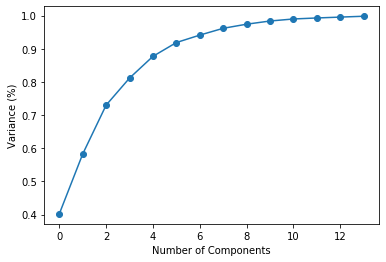

In [51]:
plt.figure()
plt.plot(np.cumsum(credit_scaled_pca.explained_variance_ratio_),marker = "o")
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

This plot tells us that selecting 5 components we can preserve something around 87% of the total variance of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.
With this information in our hands, we can implement the PCA for 5 best components.

In [52]:
credit_pca_final = PCA(n_components=5).fit(credit_scaled_ML)

In [53]:
credit_reduced_feature = credit_pca_final.fit_transform(credit_scaled_ML)

In [54]:
df_credit_reduced_feature = pd.DataFrame(credit_reduced_feature)

In [55]:
df_credit_reduced_feature.shape

(8950, 5)

In [56]:
col_list = credit_transform_selected_ML.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'LIMIT_USAGE', 'PAY_MINPAY',
       'both_oneoff_installment', 'installment', 'none', 'oneoff'],
      dtype='object')

In [57]:
pd.DataFrame(credit_pca_final.components_.T,columns=['PC_' + str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [58]:
pd.Series(credit_pca_final.explained_variance_ratio_,index = ['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

In [59]:
type(credit_scaled_pca)

sklearn.decomposition.pca.PCA

##  Clustering Algorithm - K Means Clustering

Now Our data is ready after we have done the feature selection and scaling of the data.

Before we start the KMeans we need find the optimal cluster value.for the we will be elbow method to find the optimal number of cluster.

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_range = range(3,10)
cluster_error = []

for num in cluster_range:
    cluster = KMeans(num,random_state=222)
    cluster.fit(credit_reduced_feature)
    cluster_error.append(cluster.inertia_)

In [61]:
cluster_df = pd.DataFrame({'num_cluster':cluster_range , 'cluster_error':cluster_error})
cluster_df

,num_cluster,cluster_error
0,3,64500.629290
1,4,43508.381436
2,5,36826.483543
3,6,32005.216927
4,7,28621.226760
5,8,26104.951136
6,9,24288.291191


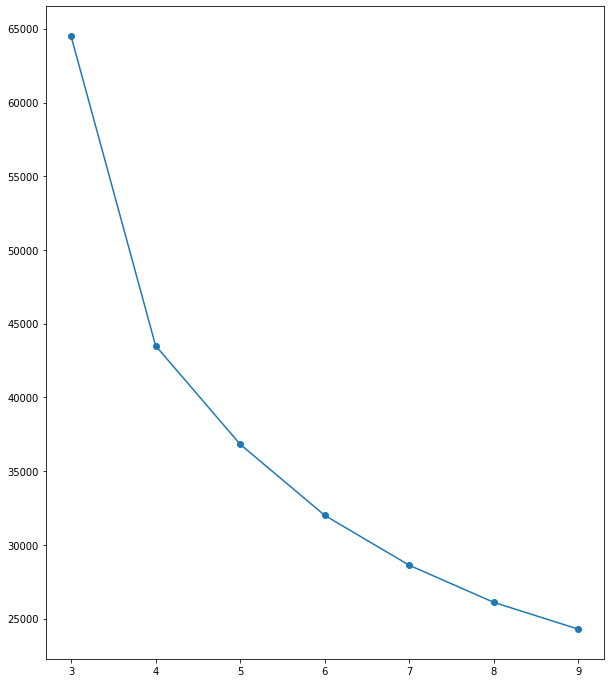

In [62]:
plt.figure(figsize=(10,12))
plt.plot(cluster_df.num_cluster,cluster_df.cluster_error,marker = "o")

From the graph, you can see the optimal k is 4, where the curve is starting to have a diminishing return. Once you have our optimal k, you run the algorithm with k equals to 4 and evaluate the clusters.

In [63]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(credit_reduced_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [64]:
pd.Series(km_4.labels_).value_counts()

2    2758
3    2228
1    2090
0    1874
dtype: int64

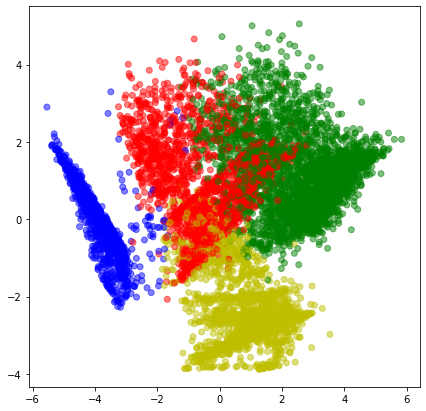

In [65]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(credit_reduced_feature[:,0],credit_reduced_feature[:,1],c=label_color,cmap='Spectral',alpha=0.5)

From the scatter plot we can see that we have 4 cluster here and we each data point classified into different cluster.

To get a clear idea of how observation are classified into different cluster we will using the original data without the varibale which are used to create new KPI's and then adding the cluster classification which we get from the kMeans algorithm and then we will be grouping the data by cluster and we will be summarizing the other variable by mean and checking how well all the observation are classified.

In [66]:
credit_pair_plot = pd.DataFrame(credit_reduced_feature,columns=['PC_'+str(i) for i in range(5)])

In [67]:
credit_pair_plot['Cluster'] = km_4.labels_

In [68]:
# Key performace variable selection .here i am dropping varibales which are used in derving new KPI
col_kpi=['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'LIMIT_USAGE', 'PAY_MINPAY',
       'both_oneoff_installment', 'installment', 'none', 'oneoff','CREDIT_LIMIT']

In [69]:
credit_transform_selected.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,LIMIT_USAGE,PAY_MINPAY
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [70]:
cluster_4_df = pd.concat([credit_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [71]:
cluster_4_df.head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,LIMIT_USAGE,PAY_MINPAY,both_oneoff_installment,installment,none,oneoff,CREDIT_LIMIT,Cluster_4
0,0,2,7.950000,0.000000,0.040901,1.446508,0,1,0,0,1000.0,3
1,4,0,0.000000,536.912124,0.457495,3.826241,0,0,1,0,7000.0,1
2,0,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1,7500.0,0
3,1,1,124.916667,17.149001,0.222223,0.000000,0,0,0,1,7500.0,0
4,0,1,1.333333,0.000000,0.681429,2.771075,0,0,0,1,1200.0,0


In [72]:
cluster_4 = cluster_4_df.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
CASH_ADVANCE_TRX,2.864995,6.552632,2.807107,1.019300
PURCHASES_TRX,7.118997,0.045933,33.125453,12.053860
Monthly_avg_purchase,69.758276,0.159337,193.696083,47.573598
Monthly_cash_advance,77.843485,186.298043,67.620006,33.489846
LIMIT_USAGE,0.378727,0.576217,0.354487,0.264275
PAY_MINPAY,5.561421,9.927979,7.268605,13.402660
both_oneoff_installment,0.003735,0.002392,1.000000,0.001795
installment,0.000000,0.017225,0.000000,0.998205
none,0.000000,0.977033,0.000000,0.000000
oneoff,0.996265,0.003349,0.000000,0.000000


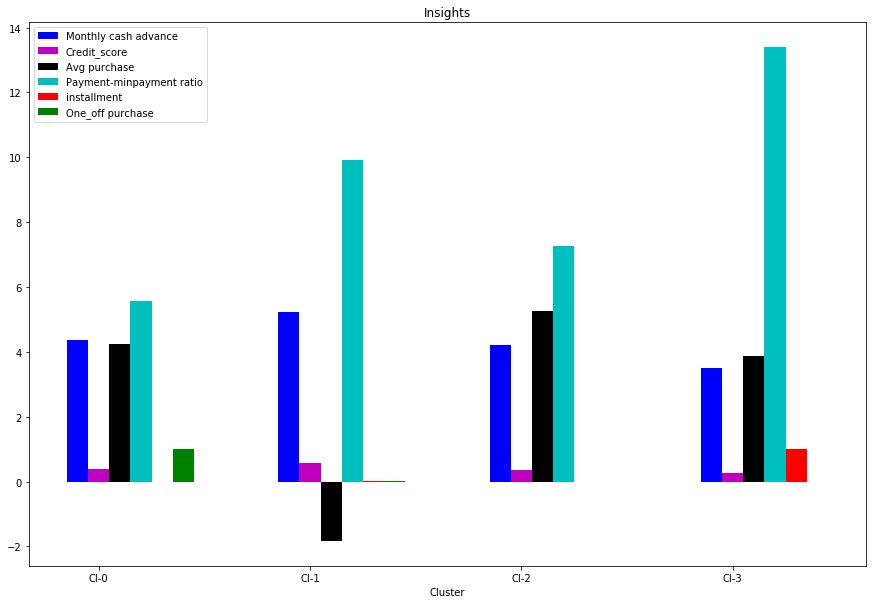

In [73]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['PAY_MINPAY',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['oneoff',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [74]:
cluster_count = cluster_4_df.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
cluster_count

Cluster_4   
0          0    1874
1          1    2090
2          2    2758
3          3    2228
Name: Cluster_4, dtype: int64

In [75]:
cluster_percentage = pd.Series((cluster_count.values.astype(float) / cluster_4_df.shape[0])*100,name = 'Percentage')
print (pd.concat([pd.Series(cluster_count.values,name='Size'),cluster_percentage],axis=1))

   Size  Percentage
0  1874   20.938547
1  2090   23.351955
2  2758   30.815642
3  2228   24.893855


**Some insight on the KMeans cluster-4**

from the above graph we can see that each cluster is clearly showing a distinguishing behaviour within the customers.

* Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. This group is about 31% of the total customer base.

* cluster 1 is taking maximum advance_cash and is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. This group is about 23% of the total customer base.

* Cluster 0 customers are doing maximum One_Off transactions and least payment ratio and credit_score on lower side This group is about 21% of the total customer base.

* Cluster 3 customers have maximum credit score and are paying dues and are doing maximum installment purchases. This group is about 25% of the total customer base

### Finding behaviour with 5 cluster

Even though we found that optimal value of K is 4 we will just see how the data will behave with number of cluster as 5.

For this cluster also we will be doing all the methods that are done for cluster 4 and finding how does the classification of the data point are done.

In [76]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(credit_reduced_feature)

In [77]:
pd.Series(km_5.labels_).value_counts()

1    2131
0    2084
2    1985
3    1860
4     890
dtype: int64

Text(0, 0.5, 'PC_1')

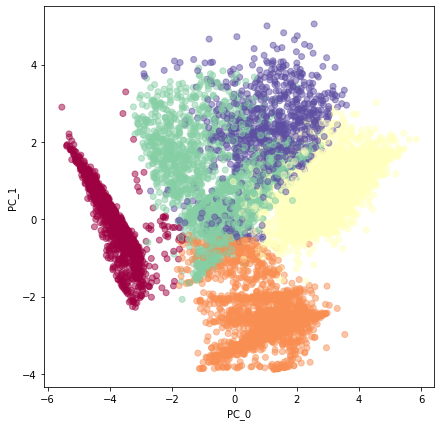

In [78]:
plt.figure(figsize=(7,7))
plt.scatter(credit_reduced_feature[:,0],credit_reduced_feature[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [79]:
cluster_5_df = pd.concat([credit_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [80]:
cluster_5 = cluster_5_df.groupby('Cluster_5').apply(lambda x: x[col_kpi].mean()).T
cluster_5

Cluster_5,0,1,2,3,4
CASH_ADVANCE_TRX,6.454894,0.484280,0.152645,2.648387,10.521348
PURCHASES_TRX,0.035509,11.896762,34.538035,7.067742,27.553933
Monthly_avg_purchase,0.096572,47.243825,209.814279,68.685725,141.745121
Monthly_cash_advance,185.109488,19.155048,3.996969,73.635703,252.661778
LIMIT_USAGE,0.576260,0.246733,0.262694,0.377563,0.595594
PAY_MINPAY,9.950170,13.861937,8.569707,5.540102,3.919233
both_oneoff_installment,0.000000,0.000000,1.000000,0.003226,0.879775
installment,0.016795,1.000000,0.000000,0.000000,0.105618
none,0.979846,0.000000,0.000000,0.000000,0.000000
oneoff,0.003359,0.000000,0.000000,0.996774,0.014607


In [81]:
cluster_count_5 = cluster_5_df.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
cluster_count_5

Cluster_5   
0          0    2084
1          1    2131
2          2    1985
3          3    1860
4          4     890
Name: Cluster_5, dtype: int64

In [82]:
cluster_percentage_5 = pd.Series((cluster_count_5.values.astype(float) / cluster_5_df.shape[0])*100,name = 'Percentage')
print (pd.concat([pd.Series(cluster_count_5.values,name='Size'),cluster_percentage_5],axis=1))

   Size  Percentage
0  2084   23.284916
1  2131   23.810056
2  1985   22.178771
3  1860   20.782123
4   890    9.944134


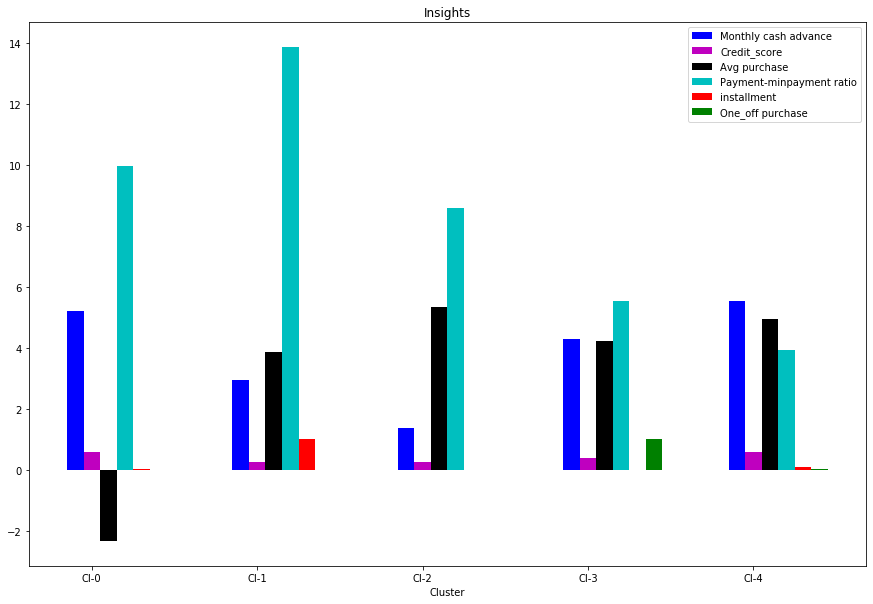

In [83]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_5.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_5.loc['Monthly_avg_purchase',:].values)
payment=cluster_5.loc['PAY_MINPAY',:].values
installment=cluster_5.loc['installment',:].values
one_off=cluster_5.loc['oneoff',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))
plt.legend()

**Insights on KMeans cluster-5**

* we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

* Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side

## Checking performance metrics for Kmeans

Here We will be validating the performace of the Kmean by using calinski_harabasz_score

In [84]:
from sklearn.metrics import calinski_harabasz_score

In [85]:
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(credit_reduced_feature)
    score_c[n]=calinski_harabasz_score(credit_reduced_feature,km_score.labels_)

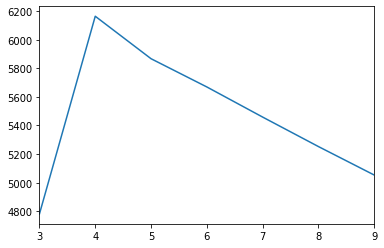

In [86]:
pd.Series(score_c).plot()

**Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.**

## Marketing strategies that can be drawn from above analysis

We Came to know that we have 4 kind of customers 

1. **Group 0**

    * This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
    
    
2. **Group 1**

    * They have poor credit score and taking only cash on advance. We can target them by providing less interest rate on purchase transaction.
    
    
3. **Group 2**

    * They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) -- we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions.
    
    
4. **Group 3**

    * This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. -- Giving rewards point will make them perform more purchases.
    
    
**Group 2 is the potential Target customer**